# New Notebook

Whats this notebook about?

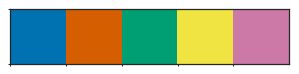

In [2]:
import sys
import os
from glob import glob
import re
import random
from ftplib import FTP

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sinaplot import sinaplot

from g4funcs.g4predict import main as g4predict

## Default plotting params

%matplotlib inline
sns.set(font='Arial')
plt.rcParams['svg.fonttype'] = 'none'
style = sns.axes_style('white')
style.update(sns.axes_style('ticks'))
style['xtick.major.size'] = 2
style['ytick.major.size'] = 2
sns.set(font_scale=2, style=style)
pal = sns.color_palette(['#0072b2', '#d55e00', '#009e73', '#f0e442', '#cc79a7'])
cmap = ListedColormap(pal.as_hex())
sns.set_palette(pal)
sns.palplot(pal)
plt.show()

In [246]:
def get_ensembl_genomes(ftp_url, base_dir, genomes):
    fasta_files = []

    def get_genome_fn(directory, line):
        line = line.split()
        fn = line[len(line) - 1]
        if fn.endswith('.dna.toplevel.fa.gz'):
            fasta_files.append((directory, fn))

    ftp = FTP(ftp_url)
    ftp.login()
    ftp.cwd(base_dir)

    for genome in genomes:
        whole_genome_dir = '{}/dna'.format(genome)
        ftp.cwd(whole_genome_dir)
        ftp.retrlines(
            'LIST',
            callback=partial(
                get_genome_fn,
                whole_genome_dir
            )
        )
        ftp.cwd(base_dir)
    ftp.close()

    for directory, fn in fasta_files:
        ftp = FTP(ftp_url)
        ftp.login()
        ftp.cwd(base_dir)
        ftp.cwd(directory + '_index')
        print('downloading {}'.format(fn + '.fai'))
        with open(fn + '.fai', 'wb') as f:
            ftp.retrbinary('RETR %s' % fn + '.fai', f.write)
        ftp.cwd(base_dir)
        ftp.cwd(directory)
        print('downloading {}'.format(fn))
        with open(fn, 'wb') as f:
            ftp.retrbinary('RETR %s' % fn, f.write)
        !/home/matthew/anaconda3/envs/jupyter_python3/bin/seqtk cutN -gp 10000 {fn} > {fn[:-6] + '_gaps.bed'}
        g4predict(
            ['intra',
             '-f', fn,
             '-b', fn[:-6] + '_3t.bed',
             '-tmin', '3',
             '-tmax', '6',
             '-lmin', '1',
             '-lmax', '7',
             '-F', '-s']
        )
        g4predict(
            ['intra',
             '-f', fn,
             '-b', fn[:-6] + '_2t.bed',
             '-tmin', '2',
             '-tmax', '2',
             '-lmin', '1',
             '-lmax', '7',
             '-F', '-s']
        )
        print('deleting fasta')
        os.remove(fn)
        !cut -f1,2 {fn + '.fai'} > {fn[:-5] + 'chrom.sizes'}
        os.remove(fn + '.fai')
        try:
            ftp.close()
        except:
            # timed out
            pass

In [239]:
genome_dirs = []

def get_dirs(line):
    if line.startswith('d'):
        line = line.split()
        genome_dirs.append(line[len(line) - 1])

ftp = FTP('ftp.ensemblgenomes.org')
ftp.login()
ftp.cwd('/pub/plants/release-39/fasta')
ftp.retrlines('LIST', callback=get_dirs)
ftp.close()
random.shuffle(genome_dirs)
print(genome_dirs)

['medicago_truncatula', 'musa_acuminata', 'arabidopsis_thaliana', 'chondrus_crispus', 'cyanidioschyzon_merolae', 'dioscorea_rotundata', 'populus_trichocarpa', 'gossypium_raimondii', 'lupinus_angustifolius', 'solanum_tuberosum', 'hordeum_vulgare', 'oryza_indica', 'leersia_perrieri', 'galdieria_sulphuraria', 'prunus_persica', 'theobroma_cacao', 'oryza_brachyantha', 'setaria_italica', 'trifolium_pratense', 'brachypodium_distachyon', 'phaseolus_vulgaris', 'oryza_nivara', 'oryza_longistaminata', 'selaginella_moellendorffii', 'vitis_vinifera', 'helianthus_annuus', 'oryza_glumaepatula', 'zea_mays', 'corchorus_capsularis', 'oryza_sativa', 'arabidopsis_lyrata', 'brassica_oleracea', 'oryza_meridionalis', 'physcomitrella_patens', 'amborella_trichopoda', 'beta_vulgaris', 'nicotiana_attenuata', 'glycine_max', 'brassica_rapa', 'oryza_punctata', 'brassica_napus', 'triticum_aestivum', 'solanum_lycopersicum', 'manihot_esculenta', 'ostreococcus_lucimarinus', 'aegilops_tauschii', 'oryza_rufipogon', 'oryz

In [244]:
genome_dirs[-11:]

['solanum_lycopersicum',
 'manihot_esculenta',
 'ostreococcus_lucimarinus',
 'aegilops_tauschii',
 'oryza_rufipogon',
 'oryza_barthii',
 'cucumis_sativus',
 'chlamydomonas_reinhardtii',
 'oryza_glaberrima',
 'triticum_urartu',
 'sorghum_bicolor']

In [247]:
get_ensembl_genomes('ftp.ensemblgenomes.org', '/pub/plants/release-39/fasta', genome_dirs[-11:])

downloading Solanum_lycopersicum.SL2.50.dna.toplevel.fa.gz.fai
downloading Solanum_lycopersicum.SL2.50.dna.toplevel.fa.gz


INFO:root:Output from G4Predict
INFO:root:Parsing command line arguments
INFO:root:Running in mode: intra
INFO:root:Parameters:
{       'bed': 'Solanum_lycopersicum.SL2.50.dna.toplevel_3t.bed',
        'fasta': 'Solanum_lycopersicum.SL2.50.dna.toplevel.fa.gz',
        'filter_overlapping': True,
        'func': <function parse_args.<locals>.intra at 0x7fa6d5bef9d8>,
        'merge_overlapping': False,
        'write_bed12': False,
        'write_bed6': True}
INFO:root:G4 Parameters: 
{       'bulge_kwargs': {'bulges_allowed': 0, 'start': 1, 'stop': 5},
        'inter_kwargs': {'start': 2, 'stop': 3},
        'loop_kwargs_list': [       {'allow_G': 1, 'start': 1, 'stop': 7},
                                    {'allow_G': 1, 'start': 1, 'stop': 7},
                                    {'allow_G': 1, 'start': 1, 'stop': 7}],
        'score_kwargs': {       'bulge_pen_factor': 5,
                                'loop_pen_factor': 1.5,
                                'tetrad_score_factor': 

deleting fasta
downloading Manihot_esculenta.Manihot_esculenta_v6.dna.toplevel.fa.gz.fai
downloading Manihot_esculenta.Manihot_esculenta_v6.dna.toplevel.fa.gz


INFO:root:Output from G4Predict
INFO:root:Parsing command line arguments
INFO:root:Running in mode: intra
INFO:root:Parameters:
{       'bed': 'Manihot_esculenta.Manihot_esculenta_v6.dna.toplevel_3t.bed',
        'fasta': 'Manihot_esculenta.Manihot_esculenta_v6.dna.toplevel.fa.gz',
        'filter_overlapping': True,
        'func': <function parse_args.<locals>.intra at 0x7fa6d5bef268>,
        'merge_overlapping': False,
        'write_bed12': False,
        'write_bed6': True}
INFO:root:G4 Parameters: 
{       'bulge_kwargs': {'bulges_allowed': 0, 'start': 1, 'stop': 5},
        'inter_kwargs': {'start': 2, 'stop': 3},
        'loop_kwargs_list': [       {'allow_G': 1, 'start': 1, 'stop': 7},
                                    {'allow_G': 1, 'start': 1, 'stop': 7},
                                    {'allow_G': 1, 'start': 1, 'stop': 7}],
        'score_kwargs': {       'bulge_pen_factor': 5,
                                'loop_pen_factor': 1.5,
                                '

deleting fasta
downloading Ostreococcus_lucimarinus.ASM9206v1.dna.toplevel.fa.gz.fai
downloading Ostreococcus_lucimarinus.ASM9206v1.dna.toplevel.fa.gz


INFO:root:Output from G4Predict
INFO:root:Parsing command line arguments
INFO:root:Running in mode: intra
INFO:root:Parameters:
{       'bed': 'Ostreococcus_lucimarinus.ASM9206v1.dna.toplevel_3t.bed',
        'fasta': 'Ostreococcus_lucimarinus.ASM9206v1.dna.toplevel.fa.gz',
        'filter_overlapping': True,
        'func': <function parse_args.<locals>.intra at 0x7fa6d5befb70>,
        'merge_overlapping': False,
        'write_bed12': False,
        'write_bed6': True}
INFO:root:G4 Parameters: 
{       'bulge_kwargs': {'bulges_allowed': 0, 'start': 1, 'stop': 5},
        'inter_kwargs': {'start': 2, 'stop': 3},
        'loop_kwargs_list': [       {'allow_G': 1, 'start': 1, 'stop': 7},
                                    {'allow_G': 1, 'start': 1, 'stop': 7},
                                    {'allow_G': 1, 'start': 1, 'stop': 7}],
        'score_kwargs': {       'bulge_pen_factor': 5,
                                'loop_pen_factor': 1.5,
                                'tetrad_s

deleting fasta
downloading Aegilops_tauschii.ASM34733v1.dna.toplevel.fa.gz.fai
downloading Aegilops_tauschii.ASM34733v1.dna.toplevel.fa.gz


INFO:root:Output from G4Predict
INFO:root:Parsing command line arguments
INFO:root:Running in mode: intra
INFO:root:Parameters:
{       'bed': 'Aegilops_tauschii.ASM34733v1.dna.toplevel_3t.bed',
        'fasta': 'Aegilops_tauschii.ASM34733v1.dna.toplevel.fa.gz',
        'filter_overlapping': True,
        'func': <function parse_args.<locals>.intra at 0x7fa6d5befb70>,
        'merge_overlapping': False,
        'write_bed12': False,
        'write_bed6': True}
INFO:root:G4 Parameters: 
{       'bulge_kwargs': {'bulges_allowed': 0, 'start': 1, 'stop': 5},
        'inter_kwargs': {'start': 2, 'stop': 3},
        'loop_kwargs_list': [       {'allow_G': 1, 'start': 1, 'stop': 7},
                                    {'allow_G': 1, 'start': 1, 'stop': 7},
                                    {'allow_G': 1, 'start': 1, 'stop': 7}],
        'score_kwargs': {       'bulge_pen_factor': 5,
                                'loop_pen_factor': 1.5,
                                'tetrad_score_factor'

deleting fasta
downloading Oryza_rufipogon.OR_W1943.dna.toplevel.fa.gz.fai
downloading Oryza_rufipogon.OR_W1943.dna.toplevel.fa.gz


INFO:root:Output from G4Predict
INFO:root:Parsing command line arguments
INFO:root:Running in mode: intra
INFO:root:Parameters:
{       'bed': 'Oryza_rufipogon.OR_W1943.dna.toplevel_3t.bed',
        'fasta': 'Oryza_rufipogon.OR_W1943.dna.toplevel.fa.gz',
        'filter_overlapping': True,
        'func': <function parse_args.<locals>.intra at 0x7fa6d5bef268>,
        'merge_overlapping': False,
        'write_bed12': False,
        'write_bed6': True}
INFO:root:G4 Parameters: 
{       'bulge_kwargs': {'bulges_allowed': 0, 'start': 1, 'stop': 5},
        'inter_kwargs': {'start': 2, 'stop': 3},
        'loop_kwargs_list': [       {'allow_G': 1, 'start': 1, 'stop': 7},
                                    {'allow_G': 1, 'start': 1, 'stop': 7},
                                    {'allow_G': 1, 'start': 1, 'stop': 7}],
        'score_kwargs': {       'bulge_pen_factor': 5,
                                'loop_pen_factor': 1.5,
                                'tetrad_score_factor': 20},
 

deleting fasta
downloading Oryza_barthii.O.barthii_v1.dna.toplevel.fa.gz.fai
downloading Oryza_barthii.O.barthii_v1.dna.toplevel.fa.gz


INFO:root:Output from G4Predict
INFO:root:Parsing command line arguments
INFO:root:Running in mode: intra
INFO:root:Parameters:
{       'bed': 'Oryza_barthii.O.barthii_v1.dna.toplevel_3t.bed',
        'fasta': 'Oryza_barthii.O.barthii_v1.dna.toplevel.fa.gz',
        'filter_overlapping': True,
        'func': <function parse_args.<locals>.intra at 0x7fa6d5befd08>,
        'merge_overlapping': False,
        'write_bed12': False,
        'write_bed6': True}
INFO:root:G4 Parameters: 
{       'bulge_kwargs': {'bulges_allowed': 0, 'start': 1, 'stop': 5},
        'inter_kwargs': {'start': 2, 'stop': 3},
        'loop_kwargs_list': [       {'allow_G': 1, 'start': 1, 'stop': 7},
                                    {'allow_G': 1, 'start': 1, 'stop': 7},
                                    {'allow_G': 1, 'start': 1, 'stop': 7}],
        'score_kwargs': {       'bulge_pen_factor': 5,
                                'loop_pen_factor': 1.5,
                                'tetrad_score_factor': 20

deleting fasta
downloading Cucumis_sativus.ASM407v2.dna.toplevel.fa.gz.fai
downloading Cucumis_sativus.ASM407v2.dna.toplevel.fa.gz


INFO:root:Output from G4Predict
INFO:root:Parsing command line arguments
INFO:root:Running in mode: intra
INFO:root:Parameters:
{       'bed': 'Cucumis_sativus.ASM407v2.dna.toplevel_3t.bed',
        'fasta': 'Cucumis_sativus.ASM407v2.dna.toplevel.fa.gz',
        'filter_overlapping': True,
        'func': <function parse_args.<locals>.intra at 0x7fa6d5befa60>,
        'merge_overlapping': False,
        'write_bed12': False,
        'write_bed6': True}
INFO:root:G4 Parameters: 
{       'bulge_kwargs': {'bulges_allowed': 0, 'start': 1, 'stop': 5},
        'inter_kwargs': {'start': 2, 'stop': 3},
        'loop_kwargs_list': [       {'allow_G': 1, 'start': 1, 'stop': 7},
                                    {'allow_G': 1, 'start': 1, 'stop': 7},
                                    {'allow_G': 1, 'start': 1, 'stop': 7}],
        'score_kwargs': {       'bulge_pen_factor': 5,
                                'loop_pen_factor': 1.5,
                                'tetrad_score_factor': 20},
 

deleting fasta
downloading Chlamydomonas_reinhardtii.v3.1.dna.toplevel.fa.gz.fai
downloading Chlamydomonas_reinhardtii.v3.1.dna.toplevel.fa.gz


INFO:root:Output from G4Predict
INFO:root:Parsing command line arguments
INFO:root:Running in mode: intra
INFO:root:Parameters:
{       'bed': 'Chlamydomonas_reinhardtii.v3.1.dna.toplevel_3t.bed',
        'fasta': 'Chlamydomonas_reinhardtii.v3.1.dna.toplevel.fa.gz',
        'filter_overlapping': True,
        'func': <function parse_args.<locals>.intra at 0x7fa6d5bef268>,
        'merge_overlapping': False,
        'write_bed12': False,
        'write_bed6': True}
INFO:root:G4 Parameters: 
{       'bulge_kwargs': {'bulges_allowed': 0, 'start': 1, 'stop': 5},
        'inter_kwargs': {'start': 2, 'stop': 3},
        'loop_kwargs_list': [       {'allow_G': 1, 'start': 1, 'stop': 7},
                                    {'allow_G': 1, 'start': 1, 'stop': 7},
                                    {'allow_G': 1, 'start': 1, 'stop': 7}],
        'score_kwargs': {       'bulge_pen_factor': 5,
                                'loop_pen_factor': 1.5,
                                'tetrad_score_fac

deleting fasta
downloading Oryza_glaberrima.AGI1.1.dna.toplevel.fa.gz.fai
downloading Oryza_glaberrima.AGI1.1.dna.toplevel.fa.gz


INFO:root:Output from G4Predict
INFO:root:Parsing command line arguments
INFO:root:Running in mode: intra
INFO:root:Parameters:
{       'bed': 'Oryza_glaberrima.AGI1.1.dna.toplevel_3t.bed',
        'fasta': 'Oryza_glaberrima.AGI1.1.dna.toplevel.fa.gz',
        'filter_overlapping': True,
        'func': <function parse_args.<locals>.intra at 0x7fa6d5bef378>,
        'merge_overlapping': False,
        'write_bed12': False,
        'write_bed6': True}
INFO:root:G4 Parameters: 
{       'bulge_kwargs': {'bulges_allowed': 0, 'start': 1, 'stop': 5},
        'inter_kwargs': {'start': 2, 'stop': 3},
        'loop_kwargs_list': [       {'allow_G': 1, 'start': 1, 'stop': 7},
                                    {'allow_G': 1, 'start': 1, 'stop': 7},
                                    {'allow_G': 1, 'start': 1, 'stop': 7}],
        'score_kwargs': {       'bulge_pen_factor': 5,
                                'loop_pen_factor': 1.5,
                                'tetrad_score_factor': 20},
   

deleting fasta
downloading Triticum_urartu.ASM34745v1.dna.toplevel.fa.gz.fai
downloading Triticum_urartu.ASM34745v1.dna.toplevel.fa.gz


INFO:root:Output from G4Predict
INFO:root:Parsing command line arguments
INFO:root:Running in mode: intra
INFO:root:Parameters:
{       'bed': 'Triticum_urartu.ASM34745v1.dna.toplevel_3t.bed',
        'fasta': 'Triticum_urartu.ASM34745v1.dna.toplevel.fa.gz',
        'filter_overlapping': True,
        'func': <function parse_args.<locals>.intra at 0x7fa6d5befe18>,
        'merge_overlapping': False,
        'write_bed12': False,
        'write_bed6': True}
INFO:root:G4 Parameters: 
{       'bulge_kwargs': {'bulges_allowed': 0, 'start': 1, 'stop': 5},
        'inter_kwargs': {'start': 2, 'stop': 3},
        'loop_kwargs_list': [       {'allow_G': 1, 'start': 1, 'stop': 7},
                                    {'allow_G': 1, 'start': 1, 'stop': 7},
                                    {'allow_G': 1, 'start': 1, 'stop': 7}],
        'score_kwargs': {       'bulge_pen_factor': 5,
                                'loop_pen_factor': 1.5,
                                'tetrad_score_factor': 20

deleting fasta
downloading Sorghum_bicolor.Sorghum_bicolor_NCBIv3.dna.toplevel.fa.gz.fai
downloading Sorghum_bicolor.Sorghum_bicolor_NCBIv3.dna.toplevel.fa.gz


INFO:root:Output from G4Predict
INFO:root:Parsing command line arguments
INFO:root:Running in mode: intra
INFO:root:Parameters:
{       'bed': 'Sorghum_bicolor.Sorghum_bicolor_NCBIv3.dna.toplevel_3t.bed',
        'fasta': 'Sorghum_bicolor.Sorghum_bicolor_NCBIv3.dna.toplevel.fa.gz',
        'filter_overlapping': True,
        'func': <function parse_args.<locals>.intra at 0x7fa6d5bef378>,
        'merge_overlapping': False,
        'write_bed12': False,
        'write_bed6': True}
INFO:root:G4 Parameters: 
{       'bulge_kwargs': {'bulges_allowed': 0, 'start': 1, 'stop': 5},
        'inter_kwargs': {'start': 2, 'stop': 3},
        'loop_kwargs_list': [       {'allow_G': 1, 'start': 1, 'stop': 7},
                                    {'allow_G': 1, 'start': 1, 'stop': 7},
                                    {'allow_G': 1, 'start': 1, 'stop': 7}],
        'score_kwargs': {       'bulge_pen_factor': 5,
                                'loop_pen_factor': 1.5,
                                '

deleting fasta


In [317]:
metazoan_genome_dirs = [
    'danio_rerio',
    'drosophila_melanogaster',
    'homo_sapiens',
    'mus_musculus',    
]

get_ensembl_genomes('ftp.ensembl.org', '/pub/release-92/fasta', metazoan_genome_dirs)

downloading Danio_rerio.GRCz11.dna.toplevel.fa.gz.fai
downloading Danio_rerio.GRCz11.dna.toplevel.fa.gz


INFO:root:Output from G4Predict
INFO:root:Parsing command line arguments
INFO:root:Running in mode: intra
INFO:root:Parameters:
{       'bed': 'Danio_rerio.GRCz11.dna.toplevel_3t.bed',
        'fasta': 'Danio_rerio.GRCz11.dna.toplevel.fa.gz',
        'filter_overlapping': True,
        'func': <function parse_args.<locals>.intra at 0x7fa6d049ed08>,
        'merge_overlapping': False,
        'write_bed12': False,
        'write_bed6': True}
INFO:root:G4 Parameters: 
{       'bulge_kwargs': {'bulges_allowed': 0, 'start': 1, 'stop': 5},
        'inter_kwargs': {'start': 2, 'stop': 3},
        'loop_kwargs_list': [       {'allow_G': 1, 'start': 1, 'stop': 7},
                                    {'allow_G': 1, 'start': 1, 'stop': 7},
                                    {'allow_G': 1, 'start': 1, 'stop': 7}],
        'score_kwargs': {       'bulge_pen_factor': 5,
                                'loop_pen_factor': 1.5,
                                'tetrad_score_factor': 20},
        'soft

KeyboardInterrupt: 

In [339]:
%%bash

grep -P '^[\dMXY]' Mus_musculus.GRCm38.dna.toplevel.chrom.sizes > M.tmp.cs
grep -P '^[\dMXY]' Mus_musculus.GRCm38.dna.toplevel_2t.bed > M.tmp.bd
grep -P '^[\dMXY]' Mus_musculus.GRCm38.dna.toplevel_3t.bed > M.tmp.bd2
mv M.tmp.cs  Mus_musculus.GRCm38.dna.toplevel.chrom.sizes
mv M.tmp.bd  Mus_musculus.GRCm38.dna.toplevel_2t.bed
mv M.tmp.bd2  Mus_musculus.GRCm38.dna.toplevel_3t.bed

grep -P '^[\dMXY]' Homo_sapiens.GRCh38.dna.toplevel.chrom.sizes > H.tmp.cs
grep -P '^[\dMXY]' Homo_sapiens.GRCh38.dna.toplevel_2t.bed > H.tmp.bd
grep -P '^[\dMXY]' Homo_sapiens.GRCh38.dna.toplevel_3t.bed > H.tmp.bd2
mv H.tmp.cs  Homo_sapiens.GRCh38.dna.toplevel.chrom.sizes
mv H.tmp.bd  Homo_sapiens.GRCh38.dna.toplevel_2t.bed
mv H.tmp.bd2  Homo_sapiens.GRCh38.dna.toplevel_3t.bed

grep -P '^[\dMXY]' Danio_rerio.GRCz11.dna.toplevel.chrom.sizes > D.tmp.cs
grep -P '^[\dMXY]' Danio_rerio.GRCz11.dna.toplevel_2t.bed > D.tmp.bd
grep -P '^[\dMXY]' Danio_rerio.GRCz11.dna.toplevel_3t.bed > D.tmp.bd2
mv D.tmp.cs  Danio_rerio.GRCz11.dna.toplevel.chrom.sizes
mv D.tmp.bd  Danio_rerio.GRCz11.dna.toplevel_2t.bed
mv D.tmp.bd2  Danio_rerio.GRCz11.dna.toplevel_3t.bed

In [352]:
%%bash
source activate jupyter_python3

for BED2T in *_2t.bed;
do
  BED3T="${BED2T%%_2t.bed}_3t.bed"
  BEDOUT="${BED2T%%_2t.bed}_2t_only.bed"
  bedtools intersect -sorted -v \
    -a $BED2T -b $BED3T > $BEDOUT
done

***** WARNING: File Hordeum_vulgare.Hv_IBSC_PGSB_v2.dna.toplevel_3t.bed has inconsistent naming convention for record:
Mt	14970	14996	3t0b5,5,4l	39.0	-

***** WARNING: File Hordeum_vulgare.Hv_IBSC_PGSB_v2.dna.toplevel_3t.bed has inconsistent naming convention for record:
Mt	14970	14996	3t0b5,5,4l	39.0	-

ERROR: Sort order was unspecified, and file Lupinus_angustifolius.LupAngTanjil_v1.0.dna.toplevel_3t.bed is not sorted lexicographically.
       Please rerun with the -g option for a genome file.
       See documentation for details.
***** WARNING: File Musa_acuminata.MA1.dna.toplevel_3t.bed has inconsistent naming convention for record:
chrUn_random	35204	35223	4t0b1,1,1l	75.5	-

***** WARNING: File Musa_acuminata.MA1.dna.toplevel_3t.bed has inconsistent naming convention for record:
chrUn_random	35204	35223	4t0b1,1,1l	75.5	-

ERROR: Sort order was unspecified, and file Triticum_urartu.ASM34745v1.dna.toplevel_2t.bed is not sorted lexicographically.
       Please rerun with the -g optio

In [358]:
%%bash
source activate jupyter_python3

rm genome_g4_densities.tsv
rm genome_sizes.tsv

for BED2T in *_2t.bed;
do
  BED3T="${BED2T%%_2t.bed}_3t.bed"
  BED2TO="${BED2T%%.bed}_only.bed"
  CHROM_SIZES="${BED2T%%_2t.bed}.chrom.sizes"
  bedtools makewindows \
    -g <(sort -k1,1 $CHROM_SIZES) \
    -w 1000000 \
    -s 1000000 |
  bedtools intersect -F 0.5 -sorted -c \
    -a stdin \
    -b $BED2T |
  bedtools intersect -F 0.5 -sorted -c \
    -a stdin \
    -b $BED2TO |
  bedtools intersect -F 0.5 -sorted -c \
    -a stdin \
    -b $BED3T |
  awk -v GENOME="${BED2T%%.*}" -v OFS='\t' \
    '{ sum_a += $4; sum_b += $5; sum_c += $6 } END { if (NR > 0) \
     {print GENOME, sum_a, sum_a / NR, sum_b, sum_b / NR, sum_c, sum_c / NR }}' >> \
  genome_g4_densities.tsv
done

for CHROM_SIZES in *.chrom.sizes;
do
  awk -v GENOME="${CHROM_SIZES%%.*}" -v OFS='\t' \
    '{ sum += $2 } END { if (NR > 0) {print GENOME, sum }}' \
    $CHROM_SIZES >> genome_sizes.tsv
done

rm: cannot remove 'genome_sizes.tsv': No such file or directory
***** WARNING: File stdin has inconsistent naming convention for record:
Mt	0	525599

***** WARNING: File stdin has inconsistent naming convention for record:
Mt	0	525599

***** WARNING: File stdin has inconsistent naming convention for record:
Mt	0	525599	1143

***** WARNING: File stdin has inconsistent naming convention for record:
Mt	0	525599	1143

***** WARNING: File stdin has inconsistent naming convention for record:
Mt	0	525599	1143	1128

***** WARNING: File stdin has inconsistent naming convention for record:
Mt	0	525599	1143	1128

***** WARNING: File stdin has inconsistent naming convention for record:
chrUn_random	0	1000000

***** WARNING: File stdin has inconsistent naming convention for record:
chrUn_random	0	1000000

***** WARNING: File stdin has inconsistent naming convention for record:
chrUn_random	0	1000000	1078

***** WARNING: File stdin has inconsistent naming convention for record:
chrUn_random	0	100000

In [362]:
!head 'genome_g4_densities.tsv'

Aegilops_tauschii	9754930	22.6916	9476445	22.0438	206980	0.48147
Amborella_trichopoda	966402	153.106	932210	147.689	27030	4.28232
Arabidopsis_lyrata	201910	227.632	199376	224.776	2222	2.50507
Arabidopsis_thaliana	117952	958.959	116492	947.089	1284	10.439
Beta_vulgaris	838883	20.6362	758270	18.6532	56424	1.38801
Brachypodium_distachyon	1093846	3116.37	1057394	3012.52	26272	74.849
Brassica_napus	909226	42.9975	880674	41.6473	23404	1.10678
Brassica_oleracea	543852	16.2986	533470	15.9875	9067	0.271727
Brassica_rapa	312296	7.6888	304555	7.49822	5867	0.144447
Chlamydomonas_reinhardtii	1417729	874.062	1251481	771.567	111444	68.7078


In [3]:
genome_sizes = pd.read_csv(
    'genome_sizes.tsv',
    sep='\t',
    names=['genome', 'genome_size']
)

genome_sizes['log_genome_size'] = np.log10(genome_sizes.genome_size)

g4_density = pd.read_csv(
    'genome_g4_densities.tsv',
    sep='\t',
    names=['genome',
           'g4_2t_count', 'mean_g4_2t_density',
           'g4_2t_3t_subtract_count', 'mean_g4_2t_3t_subtract_density',
           'g4_3t_count', 'mean_g4_3t_density']
).sort_values(by='genome').drop_duplicates()

g4_density = g4_density.merge(genome_sizes, on='genome')
g4_density.set_index('genome', inplace=True)
g4_density['g4_2t_density'] = g4_density['g4_2t_count'] / g4_density['genome_size'] * 1000000
g4_density['g4_2t_3t_subtract_density'] = g4_density['g4_2t_3t_subtract_count'] / g4_density['genome_size'] * 1000000
g4_density['g4_3t_density'] = g4_density['g4_3t_count'] / g4_density['genome_size'] * 1000000
g4_density.head()

,g4_2t_count,mean_g4_2t_density,g4_2t_3t_subtract_count,mean_g4_2t_3t_subtract_density,g4_3t_count,mean_g4_3t_density,genome_size,log_genome_size,g4_2t_density,g4_2t_3t_subtract_density,g4_3t_density
genome,,,,,,,,,,,
Aegilops_tauschii,9754930,22.6916,9476445,22.0438,206980,0.48147,3313764331,9.520322,2943.760939,2859.722072,62.460688
Amborella_trichopoda,966402,153.1060,932210,147.6890,27030,4.28232,706332640,8.849009,1368.196718,1319.788931,38.268089
Arabidopsis_lyrata,201910,227.6320,199376,224.7760,2222,2.50507,206667935,8.315273,976.977875,964.716660,10.751547
Arabidopsis_thaliana,117952,958.9590,116492,947.0890,1284,10.43900,119667750,8.077977,985.662386,973.461939,10.729708
Beta_vulgaris,838883,20.6362,758270,18.6532,56424,1.38801,566181630,8.752956,1481.649979,1339.269874,99.657066


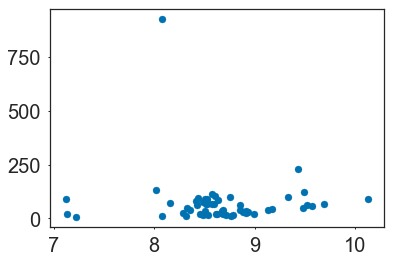

In [4]:
plt.scatter(x=g4_density.log_genome_size, y=g4_density.g4_3t_density)
plt.show()

In [284]:
!wget ftp://ftp.ensemblgenomes.org/pub/plants/release-39/species_metadata_EnsemblPlants.json

--2018-06-28 09:17:28--  ftp://ftp.ensemblgenomes.org/pub/plants/release-39/species_metadata_EnsemblPlants.json
           => ‘species_metadata_EnsemblPlants.json.1’
Resolving ftp.ensemblgenomes.org (ftp.ensemblgenomes.org)... 193.62.197.94
Connecting to ftp.ensemblgenomes.org (ftp.ensemblgenomes.org)|193.62.197.94|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/plants/release-39 ... done.
==> SIZE species_metadata_EnsemblPlants.json ... 572750073
==> PASV ... done.    ==> RETR species_metadata_EnsemblPlants.json ... done.
Length: 572750073 (546M) (unauthoritative)

species_metadata_En 100%[===================>] 546.22M  8.39MB/s    in 34s     

2018-06-28 09:18:02 (16.2 MB/s) - ‘species_metadata_EnsemblPlants.json.1’ saved [572750073]



In [285]:
import json

with open('species_metadata_EnsemblPlants.json') as f:
    organisms = [x['organism'] for x in json.load(f)]
organism = pd.DataFrame(organisms).set_index('url_name')
organism.head()

,display_name,is_reference,name,scientific_name,serotype,species_taxonomy_id,strain,taxonomy_id
url_name,,,,,,,,
Aegilops_tauschii,Aegilops tauschii,0,aegilops_tauschii,Aegilops tauschii,None,37682,None,37682
Amborella_trichopoda,Amborella trichopoda,0,amborella_trichopoda,Amborella trichopoda,None,13333,None,13333
Arabidopsis_lyrata,Arabidopsis lyrata,0,arabidopsis_lyrata,Arabidopsis lyrata subsp. lyrata,None,59689,None,81972
Arabidopsis_thaliana,Arabidopsis thaliana,0,arabidopsis_thaliana,Arabidopsis thaliana,None,3702,None,3702
Beta_vulgaris,Beta vulgaris subsp. vulgaris,0,beta_vulgaris,Beta vulgaris subsp. vulgaris,None,161934,None,3555


In [286]:
for org, taxid in organism[['taxonomy_id']].itertuples():
    !wget -O "{org}.rdf" -o /dev/null "https://www.uniprot.org/taxonomy/{taxid}.rdf?include=yes"

In [287]:
%%bash

for RDF in *.rdf;
do
  grep "<scientificName>" $RDF | perl -pe 's|<.*?>||g' > ${RDF%%.rdf}_tree.txt
done

In [288]:
!rm *.rdf

In [5]:
tree = {}
classes = {}
for tree_fn in glob('*_tree.txt'):
    name = tree_fn[:-len('_tree.txt')]
    with open(tree_fn) as f:
        nodes = [x.strip() for x in f.readlines()][::-1]
        if 'Liliopsida' in nodes:
            classes[name] = 'Monocotyledon'
        elif 'eudicotyledons' in nodes:
            classes[name] = 'Dicotyledon'
        elif 'Embryophyta' in nodes:
            classes[name] = 'Non-Flowering'
        else:
            classes[name] = 'Other'
        curr_node = tree
        for node in nodes:
            if not node in curr_node:
                curr_node[node] = {}
            curr_node = curr_node[node]
classes = pd.Series(classes)
classes['Homo_sapiens'] = 'Metazoa'
classes['Mus_musculus'] = 'Metazoa'
classes['Danio_rerio'] = 'Metazoa'
classes['Drosophila_melanogaster'] = 'Metazoa'
g4_density['class'] = classes
g4_density.head()

,g4_2t_count,mean_g4_2t_density,g4_2t_3t_subtract_count,mean_g4_2t_3t_subtract_density,g4_3t_count,mean_g4_3t_density,genome_size,log_genome_size,g4_2t_density,g4_2t_3t_subtract_density,g4_3t_density,class
genome,,,,,,,,,,,,
Aegilops_tauschii,9754930,22.6916,9476445,22.0438,206980,0.48147,3313764331,9.520322,2943.760939,2859.722072,62.460688,Monocotyledon
Amborella_trichopoda,966402,153.1060,932210,147.6890,27030,4.28232,706332640,8.849009,1368.196718,1319.788931,38.268089,Non-Flowering
Arabidopsis_lyrata,201910,227.6320,199376,224.7760,2222,2.50507,206667935,8.315273,976.977875,964.716660,10.751547,Dicotyledon
Arabidopsis_thaliana,117952,958.9590,116492,947.0890,1284,10.43900,119667750,8.077977,985.662386,973.461939,10.729708,Dicotyledon
Beta_vulgaris,838883,20.6362,758270,18.6532,56424,1.38801,566181630,8.752956,1481.649979,1339.269874,99.657066,Dicotyledon


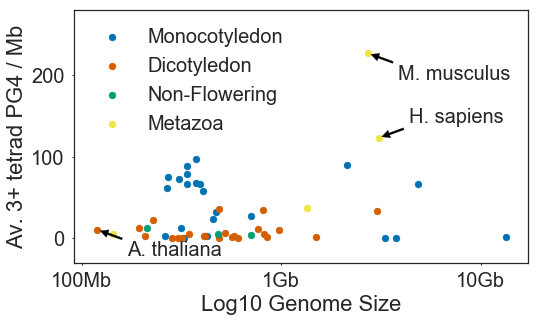

In [6]:
fig, ax = plt.subplots(figsize=(8, 5))
for i, subclass in enumerate(['Monocotyledon', 'Dicotyledon', 'Non-Flowering', 'Metazoa']):
    ax.scatter(
        x='log_genome_size',
        y='mean_g4_3t_density',
        data=g4_density[g4_density['class'] == subclass],
        color=pal[i],
        label=subclass
)
ax.legend()
_, _, _, _, _, a_g4, _, a_lgs, *_ = g4_density.loc['Arabidopsis_thaliana']
ax.annotate(s='A. thaliana',
            xy=(a_lgs, a_g4),
            xytext=(a_lgs + 0.15, a_g4 - 25), 
            fontsize=20,
            va='center',
            arrowprops=dict(facecolor='black',
                            shrink=0.1,
                            width=2,
                            headwidth=8,
                            headlength=8))
_, _, _, _, _, h_g4, _, h_lgs, *_ = g4_density.loc['Homo_sapiens']
ax.annotate(s='H. sapiens',
            xy=(h_lgs, h_g4),
            xytext=(h_lgs + 0.15, h_g4 + 25), 
            fontsize=20,
            va='center',
            arrowprops=dict(facecolor='black',
                            shrink=0.1,
                            width=2,
                            headwidth=8,
                            headlength=8))
_, _, _, _, _, m_g4, _, m_lgs, *_ = g4_density.loc['Mus_musculus']
ax.annotate(s='M. musculus',
            xy=(m_lgs, m_g4),
            xytext=(m_lgs + 0.15, m_g4 - 25), 
            fontsize=20,
            va='center',
            arrowprops=dict(facecolor='black',
                            shrink=0.1,
                            width=2,
                            headwidth=8,
                            headlength=8))
ax.set_ylim(-30, 280)
ax.set_xlabel('Log10 Genome Size')
ax.set_ylabel('Av. 3+ tetrad PG4 / Mb')
ax.set_xticks([8, 9, 10])
ax.set_xticklabels(['100Mb', '1Gb', '10Gb'])
plt.tight_layout()
plt.savefig('./genome_size_and_3t_pg4_density.svg')
plt.show()

In [7]:
stats.spearmanr(g4_density.mean_g4_3t_density, g4_density.mean_g4_2t_3t_subtract_density)

SpearmanrResult(correlation=0.94652579725175012, pvalue=1.0749657703221312e-28)

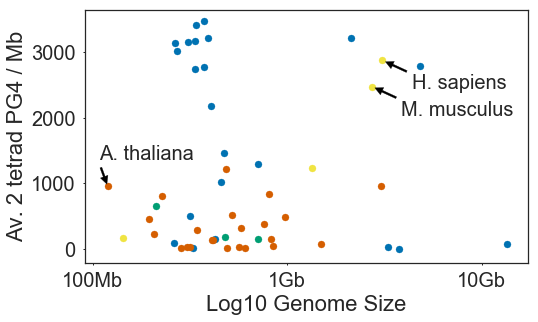

In [8]:
fig, ax = plt.subplots(figsize=(8, 5))
for i, subclass in enumerate(['Monocotyledon', 'Dicotyledon', 'Non-Flowering', 'Metazoa']):
    ax.scatter(
        x='log_genome_size',
        y='mean_g4_2t_3t_subtract_density',
        data=g4_density[g4_density['class'] == subclass],
        color=pal[i],
        label=subclass
)
#ax.legend()
_, _, _, a_g4, _, _, _, a_lgs, *_ = g4_density.loc['Arabidopsis_thaliana']
ax.annotate(s='A. thaliana',
            xy=(a_lgs, a_g4),
            xytext=(a_lgs + 0.2, a_g4 + 500), 
            fontsize=20,
            va='center',
            ha='center',
            arrowprops=dict(facecolor='black',
                            shrink=0.1,
                            width=2,
                            headwidth=8,
                            headlength=8))
_, _, _, h_g4, _, _, _, h_lgs, *_ = g4_density.loc['Homo_sapiens']
ax.annotate(s='H. sapiens',
            xy=(h_lgs, h_g4),
            xytext=(h_lgs + 0.15, h_g4 - 350), 
            fontsize=20,
            va='center',
            arrowprops=dict(facecolor='black',
                            shrink=0.1,
                            width=2,
                            headwidth=8,
                            headlength=8))
_, _, _, m_g4, _, _, _, m_lgs, *_ = g4_density.loc['Mus_musculus']
ax.annotate(s='M. musculus',
            xy=(m_lgs, m_g4),
            xytext=(m_lgs + 0.15, m_g4 - 350), 
            fontsize=20,
            va='center',
            arrowprops=dict(facecolor='black',
                            shrink=0.1,
                            width=2,
                            headwidth=8,
                            headlength=8))
#ax.set_ylim(-30, 280)
ax.set_xlabel('Log10 Genome Size')
ax.set_ylabel('Av. 2 tetrad PG4 / Mb')
ax.set_xticks([8, 9, 10])
ax.set_xticklabels(['100Mb', '1Gb', '10Gb'])
plt.tight_layout()
plt.savefig('./genome_size_and_2t_pg4_density.svg')
plt.show()

In [10]:
!mkdir simulated_genomes

In [41]:
bases = 'ATGC'

for gc_content in np.linspace(0.2, 0.8, 25):
    at_content = 1 - gc_content
    weights = [at_content / 2, at_content / 2, gc_content / 2, gc_content / 2]
    weights = np.cumsum(weights)
    with open('./simulated_genomes/gc_content_{:.2f}.fa'.format(gc_content), 'w') as f:
        f.write('>1\n')
        for window in range(50):
            r = np.searchsorted(weights, np.random.random(size=1000000))
            seq = ''.join(bases[i] for i in r)
            f.write(seq + '\n')

In [43]:
for fn in glob('./simulated_genomes/*.fa'):
    g4predict(
        ['intra',
         '-f', fn,
         '-b', fn[:-3] + '_3t.bed',
         '-tmin', '3',
         '-tmax', '6',
         '-lmin', '1',
         '-lmax', '7',
         '-F', '-s']
    )
    g4predict(
        ['intra',
         '-f', fn,
         '-b', fn[:-3] + '_2t.bed',
         '-tmin', '2',
         '-tmax', '2',
         '-lmin', '1',
         '-lmax', '7',
         '-F', '-s']
    )

INFO:root:Output from G4Predict
INFO:root:Parsing command line arguments
INFO:root:Running in mode: intra
INFO:root:Parameters:
{       'bed': './simulated_genomes/gc_content_0.20_3t.bed',
        'fasta': './simulated_genomes/gc_content_0.20.fa',
        'filter_overlapping': True,
        'func': <function parse_args.<locals>.intra at 0x7f295ae101e0>,
        'merge_overlapping': False,
        'write_bed12': False,
        'write_bed6': True}
INFO:root:G4 Parameters: 
{       'bulge_kwargs': {'bulges_allowed': 0, 'start': 1, 'stop': 5},
        'inter_kwargs': {'start': 2, 'stop': 3},
        'loop_kwargs_list': [       {'allow_G': 1, 'start': 1, 'stop': 7},
                                    {'allow_G': 1, 'start': 1, 'stop': 7},
                                    {'allow_G': 1, 'start': 1, 'stop': 7}],
        'score_kwargs': {       'bulge_pen_factor': 5,
                                'loop_pen_factor': 1.5,
                                'tetrad_score_factor': 20},
        

In [44]:
%%bash
source activate jupyter_python3

for BED2T in simulated_genomes/*_2t.bed;
do
  BED3T="${BED2T%%_2t.bed}_3t.bed"
  BEDOUT="${BED2T%%_2t.bed}_2t_only.bed"
  bedtools intersect -sorted -v \
    -a $BED2T -b $BED3T > $BEDOUT
done

In [55]:
!rm simulated_genomes/sim_genome_g4_densities.tsv

In [56]:
%%bash
source activate jupyter_python3

echo $'1\t50000000' > simulated_genomes/sim.chrom.sizes

for BED2T in simulated_genomes/*_2t.bed;
do
  BED3T="${BED2T%%_2t.bed}_3t.bed"
  BED2TO="${BED2T%%.bed}_only.bed"
  CHROM_SIZES="simulated_genomes/sim.chrom.sizes"
  bedtools makewindows \
    -g <(sort -k1,1 $CHROM_SIZES) \
    -w 1000000 \
    -s 1000000 |
  bedtools intersect -F 0.5 -sorted -c \
    -a stdin \
    -b $BED2T |
  bedtools intersect -F 0.5 -sorted -c \
    -a stdin \
    -b $BED2TO |
  bedtools intersect -F 0.5 -sorted -c \
    -a stdin \
    -b $BED3T |
  awk -v GENOME="${BED2T%%_2t.bed}" -v OFS='\t' \
    '{ sum_a += $4; sum_b += $5; sum_c += $6 } END { if (NR > 0) \
     {print GENOME, sum_a, sum_a / NR, sum_b, sum_b / NR, sum_c, sum_c / NR }}' >> \
  simulated_genomes/sim_genome_g4_densities.tsv
done

In [57]:
!head simulated_genomes/sim_genome_g4_densities.tsv

simulated_genomes/gc_content_0.20	238	4.76	238	4.76	0	0
simulated_genomes/gc_content_0.23	524	10.48	524	10.48	0	0
simulated_genomes/gc_content_0.25	1199	23.98	1199	23.98	0	0
simulated_genomes/gc_content_0.28	2293	45.86	2293	45.86	0	0
simulated_genomes/gc_content_0.30	4089	81.78	4085	81.7	4	0.08
simulated_genomes/gc_content_0.33	7177	143.54	7166	143.32	11	0.22
simulated_genomes/gc_content_0.35	12007	240.14	11988	239.76	19	0.38
simulated_genomes/gc_content_0.38	19024	380.48	18986	379.72	37	0.74
simulated_genomes/gc_content_0.40	29166	583.32	29088	581.76	77	1.54
simulated_genomes/gc_content_0.43	42964	859.28	42829	856.58	133	2.66


In [59]:
simulated_genomes = pd.read_table(
    './simulated_genomes/sim_genome_g4_densities.tsv',
    sep='\t',
    names=['genome',
           'g4_2t_count', 'mean_g4_2t_density',
           'g4_2t_3t_subtract_count', 'mean_g4_2t_3t_subtract_density',
           'g4_3t_count', 'mean_g4_3t_density']
)
simulated_genomes['gc_content'] = simulated_genomes.genome.str.extract('(0\.\d+)').astype(float)
simulated_genomes.head()

/home/matthew/anaconda3/envs/ml_python35/lib/python3.5/site-packages/ipykernel/__main__.py:9: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)


,genome,g4_2t_count,mean_g4_2t_density,g4_2t_3t_subtract_count,mean_g4_2t_3t_subtract_density,g4_3t_count,mean_g4_3t_density,gc_content
0,simulated_genomes/gc_content_0.20,238,4.76,238,4.76,0,0.00,0.20
1,simulated_genomes/gc_content_0.23,524,10.48,524,10.48,0,0.00,0.23
2,simulated_genomes/gc_content_0.25,1199,23.98,1199,23.98,0,0.00,0.25
3,simulated_genomes/gc_content_0.28,2293,45.86,2293,45.86,0,0.00,0.28
4,simulated_genomes/gc_content_0.30,4089,81.78,4085,81.70,4,0.08,0.30


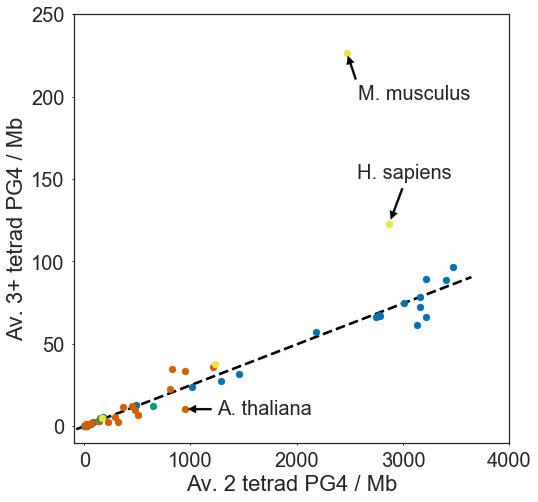

In [75]:
fig, ax = plt.subplots(figsize=(8, 7.5))
for i, subclass in enumerate(['Monocotyledon', 'Dicotyledon', 'Non-Flowering', 'Metazoa']):
    ax.scatter(
        x='mean_g4_2t_3t_subtract_density',
        y='mean_g4_3t_density',
        data=g4_density[g4_density['class'] == subclass],
        color=pal[i],
        label=subclass
)
    
sns.regplot(
    x='mean_g4_2t_3t_subtract_density',
    y='mean_g4_3t_density',
    data=g4_density,
    scatter=False,
    line_kws=dict(color='k', ls='--', zorder=0),
    ci=False,
    n_boot=0,
    robust=True,
    ax=ax,
)
#ax.legend()
_, _, _, a_g41, _, a_g42, _, _, *_ = g4_density.loc['Arabidopsis_thaliana']
ax.annotate(s='A. thaliana',
            xy=(a_g41, a_g42),
            xytext=(a_g41 + 300, a_g42), 
            fontsize=20,
            va='center',
            arrowprops=dict(facecolor='black',
                            shrink=0.1,
                            width=2,
                            headwidth=8,
                            headlength=8))
_, _, _, h_g41, _, h_g42, _, _, *_ = g4_density.loc['Homo_sapiens']
ax.annotate(s='H. sapiens',
            xy=(h_g41, h_g42),
            xytext=(h_g41 - 300, h_g42 + 25), 
            fontsize=20,
            va='bottom',
            ha='left',
            arrowprops=dict(facecolor='black',
                            shrink=0.1,
                            width=2,
                            headwidth=8,
                            headlength=8))
_, _, _, m_g41, _, m_g42, _, _, *_ = g4_density.loc['Mus_musculus']
ax.annotate(s='M. musculus',
            xy=(m_g41, m_g42),
            xytext=(m_g41 + 100, m_g42 - 25), 
            fontsize=20,
            va='center',
            arrowprops=dict(facecolor='black',
                            shrink=0.1,
                            width=2,
                            headwidth=8,
                            headlength=8))
ax.set_xlim(-100, 4000)
ax.set_ylim(-10, 250)
ax.set_xlabel('Av. 2 tetrad PG4 / Mb')
ax.set_ylabel('Av. 3+ tetrad PG4 / Mb')
plt.tight_layout()
plt.savefig('./2t_vs_3t_pg4_density.svg')
plt.show()

In [31]:
g4_density.groupby('class').median()['mean_g4_2t_density']

class
Dicotyledon       227.632
Metazoa          2022.670
Monocotyledon    2552.550
Non-Flowering     184.065
Other             874.062
Name: mean_g4_2t_density, dtype: float64

In [26]:
23 + 22 + 3

48

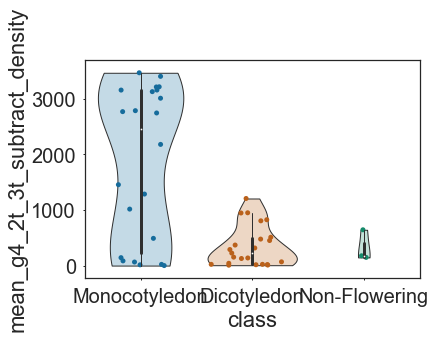

In [30]:
sinaplot(
    x='class',
    y='mean_g4_2t_3t_subtract_density',
    data=g4_density,
    order=['Monocotyledon', 'Dicotyledon', 'Non-Flowering'],
    cut=0, inner='box',
)
plt.show()

In [32]:
g4_density[g4_density['class'] == 'Dicotyledon'].sort_values('genome_size')

,g4_2t_count,mean_g4_2t_density,g4_2t_3t_subtract_count,mean_g4_2t_3t_subtract_density,g4_3t_count,mean_g4_3t_density,genome_size,log_genome_size,g4_2t_density,g4_2t_3t_subtract_density,g4_3t_density,class
genome,,,,,,,,,,,,
Arabidopsis_thaliana,117952,958.9590,116492,947.08900,1284,10.439000,119667750,8.077977,985.662386,973.461939,10.729708,Dicotyledon
Cucumis_sativus,175500,466.7550,169764,451.50000,4590,12.207400,193829320,8.287419,905.435772,875.842726,23.680628,Dicotyledon
Arabidopsis_lyrata,201910,227.6320,199376,224.77600,2222,2.505070,206667935,8.315273,976.977875,964.716660,10.751547,Dicotyledon
Prunus_persica,343798,834.4610,332119,806.11400,9236,22.417500,227411381,8.356812,1511.788893,1460.432625,40.613623,Dicotyledon
Brassica_rapa,312296,7.6888,304555,7.49822,5867,0.144447,283822783,8.453047,1100.320407,1073.046345,20.671350,Dicotyledon
Trifolium_pratense,206444,23.5103,201511,22.94850,4538,0.516798,304842038,8.484075,677.216310,661.034158,14.886398,Dicotyledon
Corchorus_capsularis,386579,23.3978,373235,22.59020,11508,0.696526,317178409,8.501304,1218.806164,1176.735205,36.282419,Dicotyledon
Theobroma_cacao,307930,296.6570,300394,289.39700,6089,5.866090,345993675,8.539068,889.987368,868.206623,17.598588,Dicotyledon
Medicago_truncatula,338475,131.9080,328334,127.95600,8417,3.280200,412800391,8.615740,819.948351,795.381999,20.390000,Dicotyledon
